# Pandas

- Series는 하나의 feature
- Series가 모여 DataFrame
- 각각의 Feature는 columns으로 호출
- 하나의 행은 sample 또는 instance

In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
sr = pd.Series([1, 2, 3, 4, 5], name='apple')
sr2 = pd.Series([6, 7, 8, 9, 10], name='banana')
sr3 = pd.Series([5, 4, 3, 2, 1], name='mango', index=['A', 1, 'C', 'D', 'E'])

In [4]:
pd.concat([sr, sr2, sr3], axis=1)

,apple,banana,mango
0,1.0,6.0,NaN
1,2.0,7.0,4.0
2,3.0,8.0,NaN
3,4.0,9.0,NaN
4,5.0,10.0,NaN
A,NaN,NaN,5.0
C,NaN,NaN,3.0
D,NaN,NaN,2.0
E,NaN,NaN,1.0


In [5]:
lst = {
    'name':['a', 'b', 'c'],
    'score': [1, 2, 3],
    'lol': [True, False, True]
}

index=['Son', 'Kane', 'Kim']

In [6]:
k = pd.DataFrame(lst, index=index)

In [7]:
k

,name,score,lol
Son,a,1,True
Kane,b,2,False
Kim,c,3,True


In [8]:
k.columns

Index(['name', 'score', 'lol'], dtype='object')

In [9]:
k.rename(columns={'score':'점수'}, inplace=True)

In [10]:
k

,name,점수,lol
Son,a,1,True
Kane,b,2,False
Kim,c,3,True


In [11]:
df = pd.read_csv('./dataset/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.isna()              # 결측치 T/F
x = df.isna().sum(axis=0)  # 결측치 개수

In [14]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

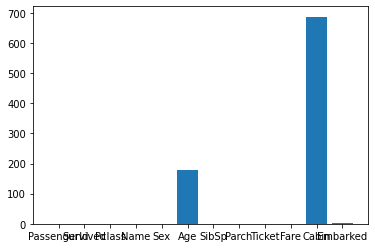

In [15]:
plt.figure()
plt.bar(x.index, x.values)   # 결측치 시각화

In [16]:
pd.get_dummies(df["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [19]:
type(df[["Embarked", 'Pclass']])

pandas.core.frame.DataFrame

In [20]:
df["Embarked"]  # series

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [21]:
df[["Embarked"]]  # DataFrame

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [23]:
df.iloc[:5, :5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [32]:
df.loc[(df["Embarked"]=='C') & (df["Survived"]==1), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [34]:
df.sort_index(axis=0, ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [35]:
df.sort_values(by=["Age", "Fare"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [38]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [42]:
df.drop(["SibSp", "Parch"], axis=1, inplace=True)

KeyError: "['SibSp', 'Parch'] not found in axis"

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [45]:
df.loc[df["Age"] < 1.0, "Cabin"] = "None"

In [51]:
df = df.select_dtypes(include=["int64"])

In [52]:
def f1(x):
    return x.max() - x.min()

In [56]:
df.apply(f1)                 # apply: 함수에 instance를 반복 입력
                             # (column으로 입력되는 것이 아님. 개별적으로 입력됨)

PassengerId    890
Survived         1
Pclass           2
FamilySize      10
dtype: int64

In [59]:
def f2(x):
    if x < 10:
        print(x)
    return x

In [60]:
df["PassengerId"].apply(f2)  

1
2
3
4
5
6
7
8
9


0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [61]:
df.PassengerId = df.PassengerId.apply(f2)

1
2
3
4
5
6
7
8
9


In [62]:
df["Survived"].apply(lambda x: 'saved' if x == 1 else 'lost')

0       lost
1      saved
2      saved
3      saved
4       lost
       ...  
886     lost
887    saved
888     lost
889    saved
890     lost
Name: Survived, Length: 891, dtype: object

In [65]:
df["Survived"].map()

TypeError: map() missing 1 required positional argument: 'arg'

In [66]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
FamilySize     0
dtype: int64

In [69]:
df.dropna()

,PassengerId,Survived,Pclass,FamilySize
0,1,0,3,1
1,2,1,1,1
2,3,1,3,0
3,4,1,1,1
4,5,0,3,0
...,...,...,...,...
886,887,0,2,0
887,888,1,1,0
888,889,0,3,3
889,890,1,1,0


In [70]:
df.fillna(0)

,PassengerId,Survived,Pclass,FamilySize
0,1,0,3,1
1,2,1,1,1
2,3,1,3,0
3,4,1,1,1
4,5,0,3,0
...,...,...,...,...
886,887,0,2,0
887,888,1,1,0
888,889,0,3,3
889,890,1,1,0


In [71]:
df["PassengerId"] = df["PassengerId"].fillna(df["PassengerId"].mean())

In [73]:
df["Pclass"].value_counts()  # 범주형 데이터 확인, 막대 그래프 가능

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [74]:
df.drop(columns="Pclass", inplace=True)

In [75]:
df.head()

,PassengerId,Survived,FamilySize
0,1,0,1
1,2,1,1
2,3,1,0
3,4,1,1
4,5,0,0


In [76]:
import matplotlib.pyplot as plt

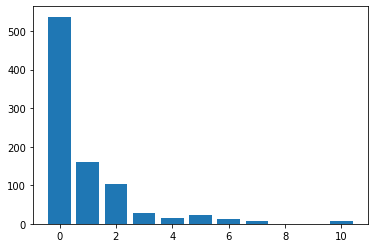

In [78]:
sr = df["FamilySize"].value_counts()

plt.figure()
plt.bar(sr.index, sr.values)
plt.show()

## Groupby

In [98]:
df = pd.read_csv('./dataset/titanic_train.csv')

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.loc[df["Sex"] == "male", "Age"].mean()       # 남성 승객의 나이 평균
df.loc[df["Sex"] == "female", "Age"].mean()                 # 여성 승객의 나이 평균

27.915708812260537

In [101]:
data = {
    'city': ['Busan','Busan','Busan','Busan', 'Seoul', 'Seoul', 'Seoul'],
    'fruit': ['Apple','Orange','Banana','Banana', 'Apple', 'Apple', 'Banana'],
    'price': ['100', '200', '300', '150', '200', '100', '200'],
    'quantity': [1, 2, 3, 4, 5, 6, 7],
}

df1 = pd.DataFrame(data)
df1.head()

,city,fruit,price,quantity
0,Busan,Apple,100,1
1,Busan,Orange,200,2
2,Busan,Banana,300,3
3,Busan,Banana,150,4
4,Seoul,Apple,200,5


In [102]:
df1.groupby('city').price.mean()

city
Busan    2.505008e+10
Seoul    6.670007e+07
Name: price, dtype: float64

In [103]:
df1.groupby(['city', 'fruit']).price.mean()

city   fruit 
Busan  Apple        100.0
       Banana    150075.0
       Orange       200.0
Seoul  Apple     100050.0
       Banana       200.0
Name: price, dtype: float64

In [105]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### 연속형 데이터를 범주형으로 변경

In [106]:
df = pd.read_csv('./dataset/titanic_train.csv')

In [110]:
df['AgeClass'] = pd.cut(df['Age'], 3, labels=['child', 'young', 'old'])  # 연속형 데이터 Age column을 범주형으로 변경(3등분)

In [111]:
df['AgeClass'].head()

0    child
1    young
2    child
3    young
4    young
Name: AgeClass, dtype: category
Categories (3, object): ['child' < 'young' < 'old']

In [114]:
import numpy as np

In [121]:
data = {
    "Dave": "dave@gmail.com",
    "Stiven": "Stiven@gmail.com",
    "Yunoi": "yunoi@naver.com",
    "Tom": np.nan
}
sr = pd.Series(data)

In [122]:
sr

Dave        dave@gmail.com
Stiven    Stiven@gmail.com
Yunoi      yunoi@naver.com
Tom                    NaN
dtype: object

In [123]:
sr.values

array(['dave@gmail.com', 'Stiven@gmail.com', 'yunoi@naver.com', nan],
      dtype=object)

In [124]:
sr.str

In [125]:
sr.str.contains('gmail')

Dave       True
Stiven     True
Yunoi     False
Tom         NaN
dtype: object

In [145]:
sr.str.findall('^[a-zA-Z0-9+-\_.]+@')   # 정규표현식 

Dave        [dave@]
Stiven    [Stiven@]
Yunoi      [yunoi@]
Tom             NaN
dtype: object

In [139]:
df['Name'].str.findall('[Mr]+[.]')

0      [Mr.]
1         []
2         []
3         []
4      [Mr.]
       ...  
886       []
887       []
888       []
889    [Mr.]
890    [Mr.]
Name: Name, Length: 891, dtype: object

# 시계열 데이터 Time Series Data

- Index: Time
- Column: Feature

In [147]:
data = np.random.randn(1000, 3)


In [156]:
df_2 = pd.DataFrame(data, index=pd.date_range('1/1/2022', periods=1000), columns=['A', 'B', 'C'])

In [157]:
df_2.head()

,A,B,C
2022-01-01,0.212053,0.174035,-0.758131
2022-01-02,2.230282,0.789821,1.339788
2022-01-03,0.344855,0.732193,-0.098015
2022-01-04,-0.790989,-0.755939,-2.255520
2022-01-05,-0.840255,-0.070777,-1.018255
